CSCI P-556: Applied Machine Learning

Fall 2019

Assignment 4

Due: 11:59PM, December 6, 2019

Read dataset

In [1]:
import pandas as pd
import string
import matplotlib.pyplot as plt
import numpy as np
import string
from sklearn.preprocessing import StandardScaler
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('a4-train.csv', index_col=0)
test = pd.read_csv('a4-test.csv', index_col=0)


train_X = train.loc[:, train.columns != 'labels']
train_y = train['labels']

test_X = test.loc[:, test.columns != 'labels']
test_y = test['labels']

Task 1: Perform exploratory data analysis (15 points)

#### 1. Basic data description

In [3]:
test.describe()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_491,feat_492,feat_493,feat_494,feat_495,feat_496,feat_497,feat_498,feat_499,labels
count,600.000000,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,...,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,481.808333,483.88000,506.581667,483.298333,498.636667,479.661667,481.751667,476.585000,487.758333,478.865000,...,478.776667,485.898333,501.631667,494.85500,510.193333,477.923333,482.651667,509.968333,491.661667,0.500000
std,5.940293,30.86557,38.365434,8.549727,41.199762,7.220625,39.939478,1.416375,16.021373,7.692772,...,4.114406,22.723452,126.882457,35.10643,38.522841,5.803182,13.765760,36.366351,26.255529,0.500417
min,462.000000,377.00000,390.000000,458.000000,360.000000,460.000000,345.000000,471.000000,437.000000,456.000000,...,465.000000,420.000000,103.000000,402.00000,353.000000,462.000000,443.000000,384.000000,427.000000,0.000000
25%,478.000000,464.00000,481.000000,478.000000,470.000000,475.000000,453.000000,476.000000,477.750000,474.000000,...,476.000000,471.000000,409.750000,471.00000,485.000000,474.000000,473.000000,485.000000,474.000000,0.000000
50%,482.000000,485.00000,506.000000,483.000000,496.500000,480.000000,484.000000,477.000000,487.000000,478.000000,...,479.000000,486.000000,510.000000,495.00000,508.500000,478.000000,482.000000,508.000000,492.000000,0.500000
75%,486.000000,505.00000,533.000000,489.000000,525.000000,484.000000,508.000000,477.000000,497.000000,483.000000,...,481.000000,501.000000,589.250000,517.00000,536.000000,482.000000,492.250000,533.000000,508.000000,1.000000
max,500.000000,610.00000,619.000000,508.000000,618.000000,501.000000,606.000000,482.000000,547.000000,505.000000,...,492.000000,571.000000,822.000000,614.00000,620.000000,494.000000,526.000000,621.000000,593.000000,1.000000


#### 2. Check - Missing Data

In [4]:
train_missing = pd.isna(train)
sum(train_missing.sum())
#No missing values in Training set

0

In [5]:
test_missing = pd.isna(test)
sum(test_missing.sum())
#No missing values in Test set

0

#### 3. Check - Negative Values

In [6]:
train_anom = (train<0)
sum(train_anom.sum())

0

In [7]:
test_anom = (test<0)
sum(test_anom.sum())

0

#### Check - Distributions

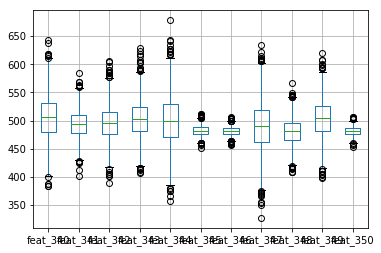

In [8]:
train[['feat_340','feat_341','feat_342','feat_343','feat_344','feat_345','feat_346','feat_347','feat_348','feat_349','feat_350']].boxplot()

#### Observations - 
 - Some outliers observed
 - More or less equally(normal) distributed around the mean

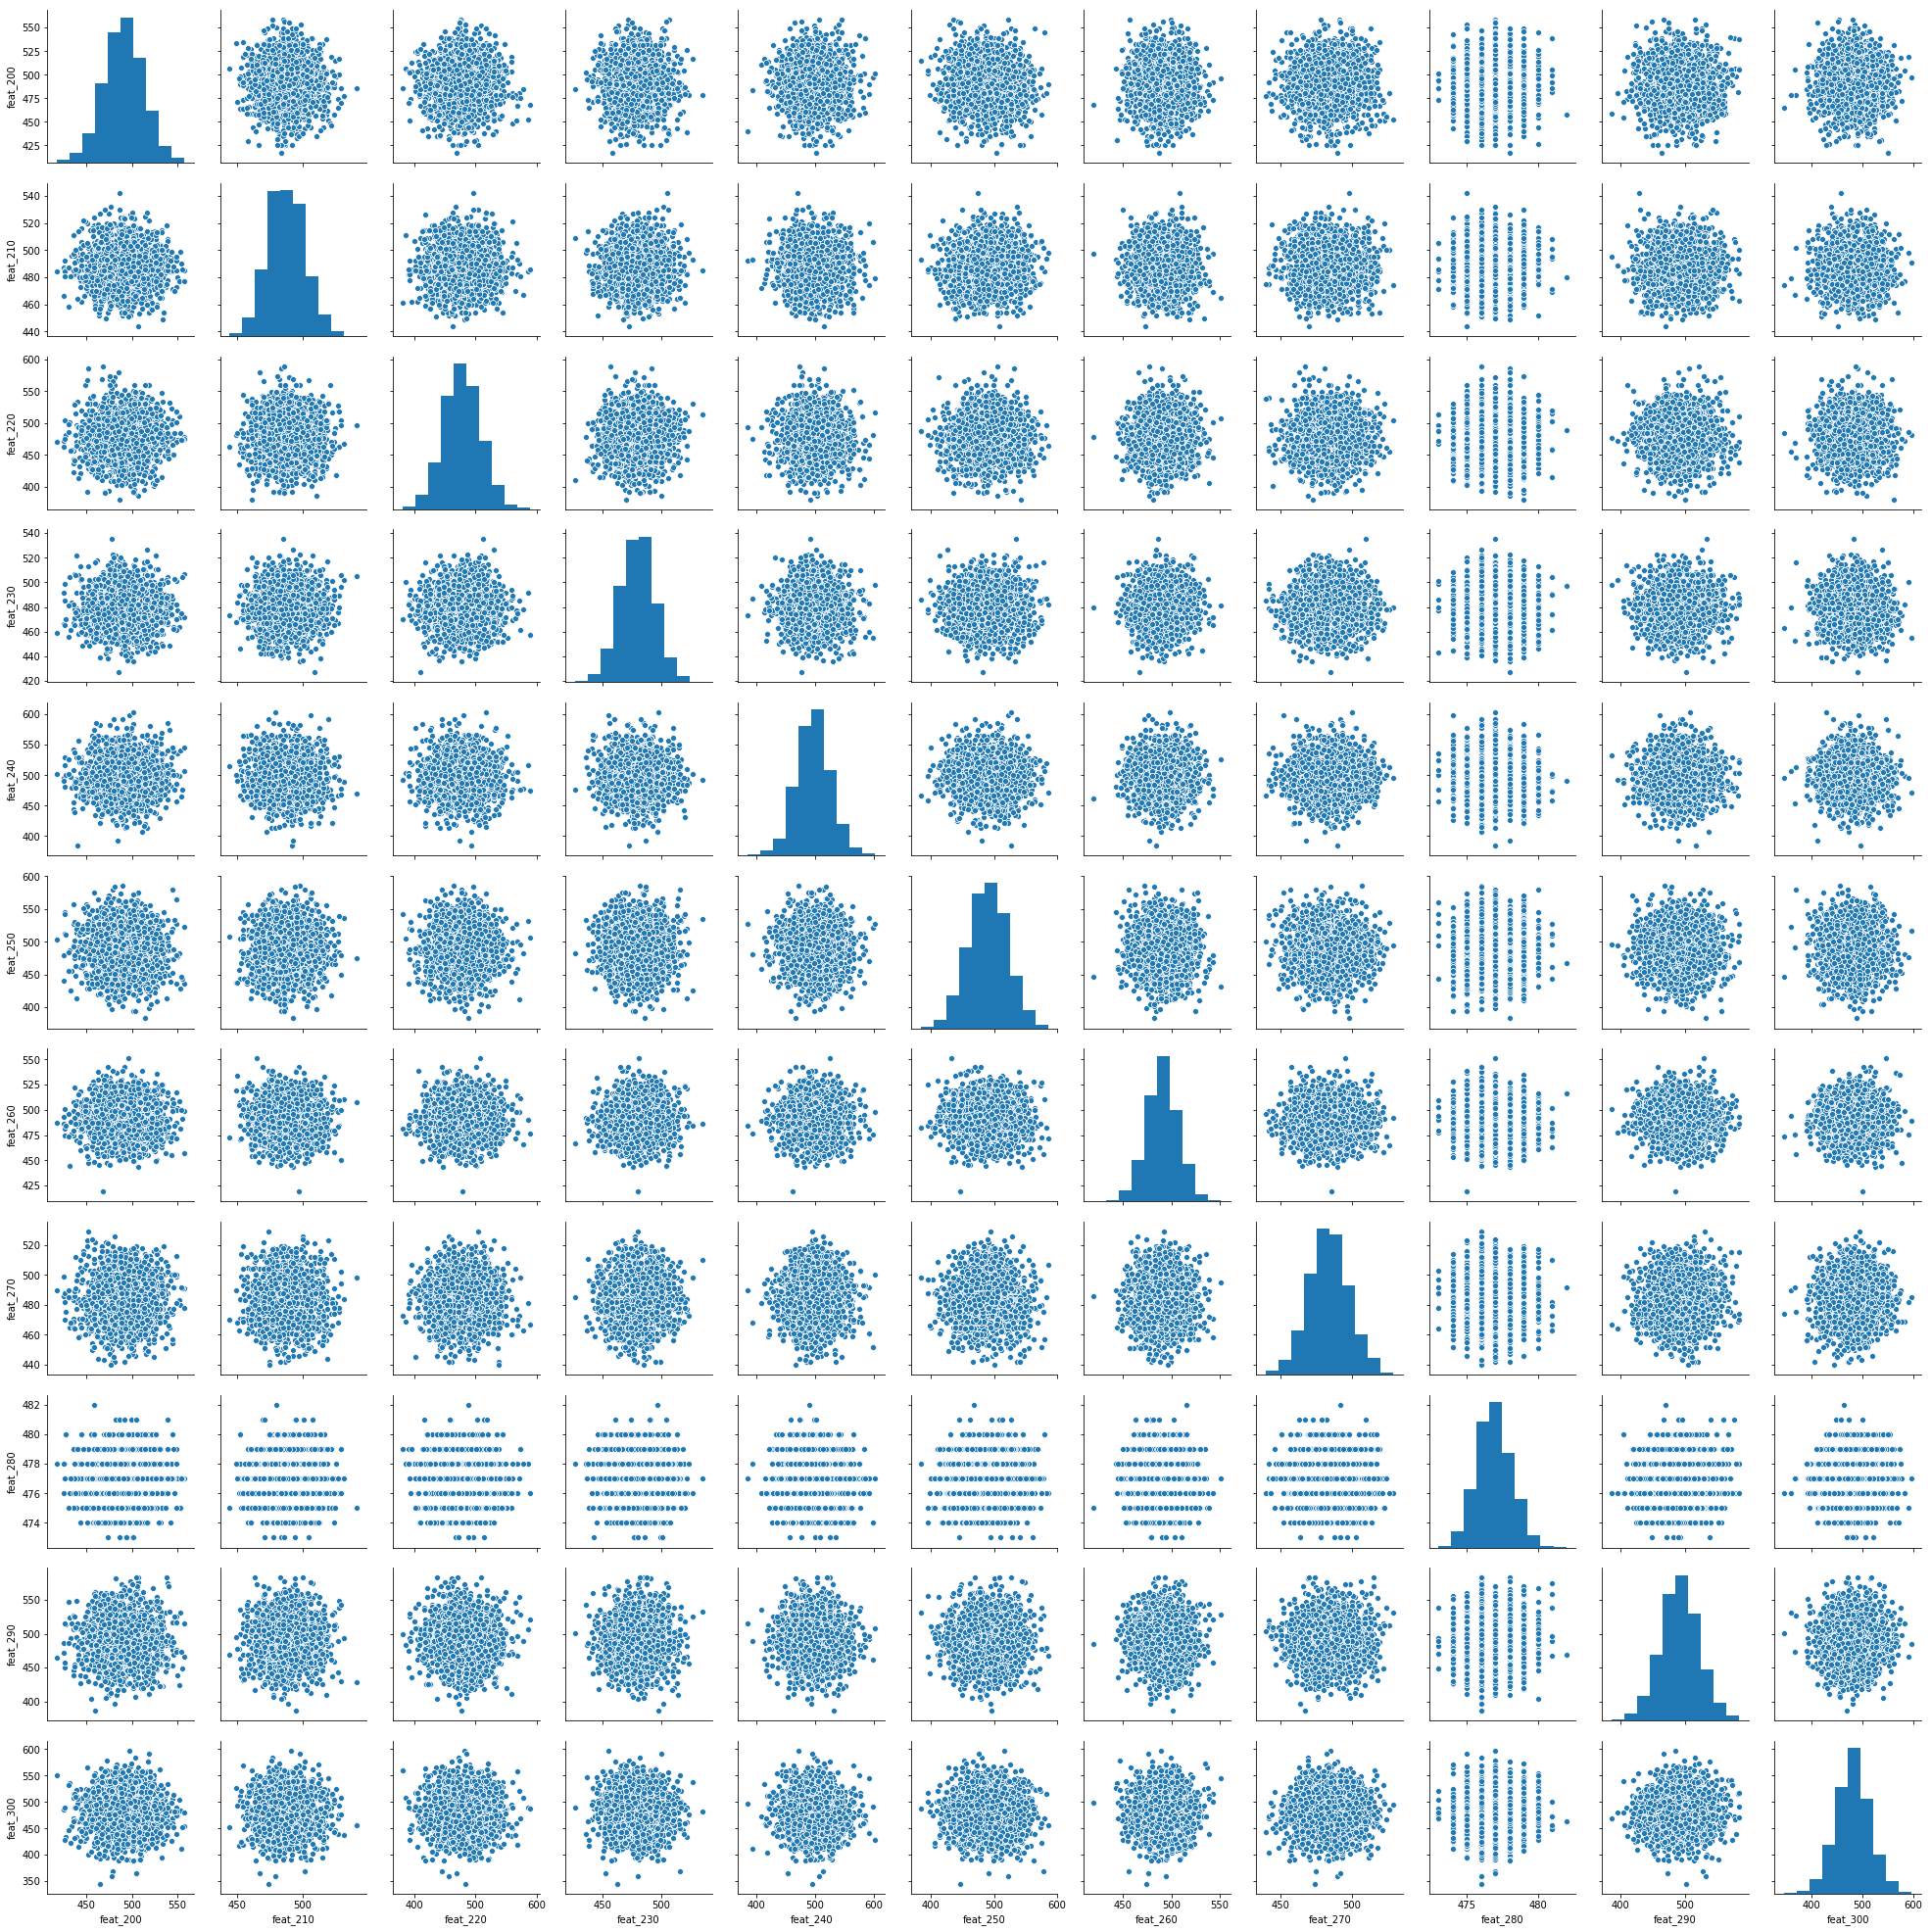

In [9]:
sb.pairplot(train[['feat_200','feat_210','feat_220','feat_230','feat_240','feat_250','feat_260','feat_270','feat_280','feat_290','feat_300']])

#### Observations - 
- Some of them are distributed over multiple intervals like feat_280
- The data closely approximates a normal distribution

#### Check - Look at features with less than 10 unique data points

In [10]:
dicty = {}
for col in train.columns:
    count = train[col].nunique()
    dicty[col] = count

cat_features = {}
for key,val in dicty.items():
    if val <10:
        cat_features[key] = val

In [11]:
cat_features

{'feat_90': 5,
 'feat_168': 9,
 'feat_173': 9,
 'feat_228': 7,
 'feat_276': 5,
 'feat_332': 8,
 'feat_404': 6,
 'feat_423': 5,
 'labels': 2}

#### Observations
- These are the features (ignoring the label, of course) that have fewer than 10 unique values.
- They can be considered for categorization 

#### What about the labels ?

In [12]:
#Looking at the positive labels
sum(train['labels'])

1000

In [13]:
#Positive and negative labels
len(train['labels'])

2000

<b>Obervation</b> - They are equally distributed

In [14]:
sum(test['labels'])

300

In [15]:
len(test['labels'])

600

<b>Obervation</b> - Negative[0] class is twice as much as the positive[1]. Does not matter as it is the test set

#### Check - Are the features correlated with each other ?

In [16]:
corr = train.corr()

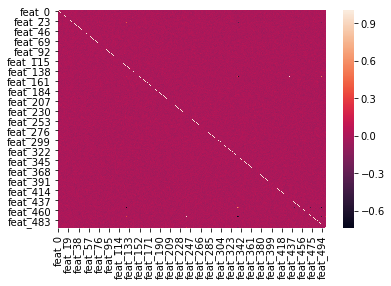

In [17]:
sb.heatmap(corr)

<b>Observation</b> - Except for very few column pairs(~10), all columns seem to be uncorrelated with each other

We can consider to remove some of these highly correlated columns to eliminiate redundancy

In [18]:
corr = abs(corr)

In [19]:
indexes = []
for i in range(corr.shape[0]):
    for j in range(i):
        if corr.iloc[i,j] != int(1) and corr.iloc[i,j] >0.90:
            indexes.append((i,j))         

#### Feature pairs that are correlated (>0.90)

In [20]:
indexes

[(128, 105),
 (281, 153),
 (318, 28),
 (336, 64),
 (378, 48),
 (433, 153),
 (433, 281),
 (451, 28),
 (451, 318),
 (472, 442),
 (475, 241),
 (493, 453)]

#### Correlation values

In [21]:
for i in range(len(indexes)):
    print(np.round(corr.iloc[indexes[i][0],indexes[i][1]],4))

0.9894
0.9887
0.9896
0.9904
0.9883
0.9894
0.989
0.9892
0.9887
0.9903
0.9893
0.9885


#### A subset 

In [22]:
temp = train[['feat_104','feat_105','feat_106','feat_107','feat_108','feat_109','feat_110','feat_111','feat_112','feat_113','feat_114','feat_115','feat_116','feat_117','feat_118','feat_119','feat_120','feat_121','feat_122','feat_123','feat_124','feat_125','feat_126','feat_127','feat_128','feat_129']]

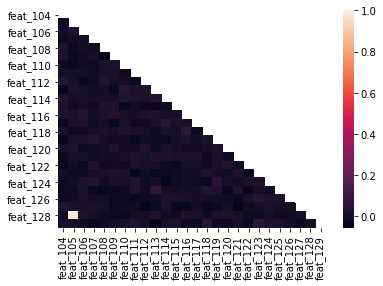

In [23]:
matrix = np.triu(temp.corr())
sb.heatmap(temp.corr(), mask=matrix)

Task 2: Use scikit-learn's logistic regression to establish a baseline model. We are not expecting this model to perform well, we just want to know what is the highest accuracy that we can achieve without doing any feature engineering and/or parameter tuning. (5 points)

In [24]:
import sklearn.linear_model 

model = sklearn.linear_model.LogisticRegression()
model.fit(train_X,train_y)

print("Baseline Accuracy - Logostic Regression - " , model.score(test_X,test_y))

Baseline Accuracy - Logostic Regression -  0.5916666666666667


Task 3: Feature engineering. On this task you'll write code to modify your features such that the model can achieve a higher accuracy. You are free to modify the data as you want, but a rationale has to be provided for each modification. Additionally, if you are using anything that has not been covered in class, write a brief description of how the function works. Note that copy/pasting a function's docstring is not what we are asking and we will take off points if this is what you do. (20 points)

#### Experiments in Feature Engineering
The following section shows a few approaches to feature engineering
1. Normalization
2. PCA
3. Choosing top n features 

A model is fit after each of these approaches and evaluated which approach is the best to consider when modelling. A Random Forest model is considered as a basis for evaluating/comparing each of the approaches

In [53]:
#Training the RF model before making any changes to the data - Baseline Model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 1000, random_state = 48,max_depth=10)
rf.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=48, verbose=0, warm_start=False)

In [54]:
rf.score(test_X,test_y)

0.7333333333333333

#### Approach 1 - Standardization
- Normalizing all the columns

In [26]:
##normalising the data to a same scale
normaliser = StandardScaler()

train_stand =pd.DataFrame(normaliser.fit_transform(train))
test_stand = pd.DataFrame(normaliser.fit_transform(test))

In [27]:
train_X_stand = train_stand.loc[:, train_stand.columns != 500]
train_y_stand = train_stand[500]

test_X_stand = test_stand.loc[:, test_stand.columns != 500]
test_y_stand = test_stand[500]

In [56]:
from sklearn.ensemble import RandomForestClassifier

#Train a random forest classifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 48, max_depth=10)
rf.fit(train_X_stand, train_y_stand)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=22, verbose=0, warm_start=False)

In [57]:
rf.score(test_X_stand,test_y)

0.345

#### Approach 2 - Principal Component Analysis

In [58]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [59]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(train_X)

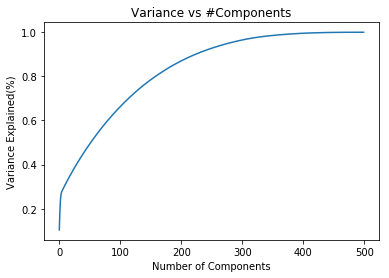

In [60]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained(%)') 
plt.title('Variance vs #Components')
plt.show()

#### Observations - 
- We can eliminate 100 features while ensuring nearly most of the variance captured
- However it is interesting that the elbow in the above curve appears roughly around 10

In [179]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(train_X)
train_X_PCA = pd.DataFrame(data = principalComponents)#, columns = ['PC_01', 'PC_02','PC_03', 'PC_04', 'PC_05','PC_06','PC_07','PC_08','PC_09','PC_10'])
principalComponents = pca.fit_transform(test_X)
test_X_PCA = pd.DataFrame(data = principalComponents)#, columns = ['PC_01', 'PC_02', 'PC_03','PC_04', 'PC_05', 'PC_06','PC_07','PC_08','PC_09','PC_10'])

In [180]:
from sklearn.ensemble import RandomForestClassifier

#Train a random forest classifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 22,max_depth=10)
rf.fit(train_X_PCA, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=22, verbose=0, warm_start=False)

In [181]:
rf.score(test_X_PCA,test_y)

0.6216666666666667

#### Approach 3 - Hybrid 
Eliminating 100 features still leaves us with 400 features, which is still a lot of features to push through a model. The following implementation considers a way to reduce the number of features using only the top 'n' predictors of the label

- A random forest model is trained and importance values for each column is extracted
- They are then tried for a combination of number of features like 10, 20 and so on.
- The combination with the best accuracy score is chosen as the 'n'

Step 1 - Remove one of the columns with high correlation as seen earlier with the variable name "indexes"

In [29]:
#Highly correlated columns
indexes

[(128, 105),
 (281, 153),
 (318, 28),
 (336, 64),
 (378, 48),
 (433, 153),
 (433, 281),
 (451, 28),
 (451, 318),
 (472, 442),
 (475, 241),
 (493, 453)]

In [30]:
train_X_stand = train_X_stand.drop([105,64,48,153,281,28,318,442,241,453], axis=1)

In [31]:
train_X_stand.shape

(2000, 490)

In [33]:
from sklearn.ensemble import RandomForestClassifier
#Train a random forest classifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 48,max_depth=10)
rf.fit(train_X_stand, train_y_stand)

#Extract feature importances from the RF Classifier
scores = pd.DataFrame({'column': train_X_stand.columns.tolist(), 'importance': list(rf.feature_importances_)})
scores.head()

,column,importance
0,0,0.001331
1,1,0.001925
2,2,0.001791
3,3,0.001492
4,4,0.002746


In [34]:
for i in (10,20,30,40,50,60,70,80,90):
    column_list = scores.sort_values('importance',ascending= False).nlargest(i,'importance')['column'].tolist()
    rf.fit(train_X_stand[column_list], train_y_stand)
    print("#Features: " ,i ," Accuracy: " ,rf.score(test_X_stand[column_list],test_y_stand))

#Features:  10  Accuracy:  0.8833333333333333
#Features:  20  Accuracy:  0.8533333333333334
#Features:  30  Accuracy:  0.83
#Features:  40  Accuracy:  0.8133333333333334
#Features:  50  Accuracy:  0.7983333333333333
#Features:  60  Accuracy:  0.7683333333333333
#Features:  70  Accuracy:  0.7583333333333333
#Features:  80  Accuracy:  0.75
#Features:  90  Accuracy:  0.7466666666666667


#### Note - 
The accuracy was highest for n = 20 before removing the highly correlated columns. But now can be seen it is 10

In [35]:
#Most Important features are 
best_features = scores.sort_values('importance',ascending= False).nlargest(10,'importance')['column'].tolist()
best_features

[475, 338, 128, 336, 472, 378, 493, 433, 451, 204]

#### Observation-
- As can be seen above, eliminating features that dont explain much of the label can help with the accuracy

Task 4: Model building & evaluation. Train at least 4 models:


1.   Neural network (any type of NN is fine)
2.   Decision tree (can be a plain decision tree, random forest, gradient boosted trees, etc.)
3.   Support vector machine
4.   Your choice of Naive Bayes or K-nearest neighbors

For model 4, briefly (no more than 2 paragraphs) describe how the model works. 

Part of your grade will depend on how your best model performs against the best model of all the classmates, as determined by the accuracy achieved using the test set. You are encouraged to share your best model's accuracy on Piazza, but not which feature engineering or model tuning steps you took to achieve it. (60 points)

### Model 1 - Neural Nets

In [150]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [151]:
def model():
    model = Sequential()
    model.add(Dense(60, input_dim=10, activation='sigmoid'))
    model.add(Dense(20, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [154]:
#### Performing K- fold CV with 5 splits

In [152]:
fit = KerasClassifier(build_fn=model, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=5, shuffle=True)
results = cross_val_score(fit, train_X_stand[best_features], train_y_stand, cv=kfold)

In [153]:
max(results)

0.8849999904632568

### Model 2 - Random Forest

In [155]:
rf.fit(train_X_stand[best_features], train_y)
np.round(rf.score(test_X_stand[best_features],test_y),2)

0.88

### Model 3 - SVM

In [36]:
from sklearn.svm import SVC

model = SVC()
model.fit(train_X_stand[best_features], train_y_stand)
score=model.score(test_X_stand[best_features],test_y_stand)

In [37]:
score

0.8266666666666667

### Model 4 - K Nearest Neighbours

In [158]:
progress = {}
for i in range(1,50):
    knn = neighbors.KNeighborsClassifier(n_neighbors = i, metric='euclidean')
    knn.fit(train_X_stand[best_features],train_y_stand)
    best_score = knn.score(test_X_stand[best_features],test_y_stand)
    progress[i] = best_score

In [171]:
val=list(progress.values())
key=list(progress.keys())
k = key[val.index(max(val))]
score= max(progress.values())
print("The best score was obtained at k:",k,"with an accuracy of:",score)

The best score was obtained at k: 14 with an accuracy of: 0.9


#### How the K - nearest neighbour model works

The KNN algorithm works under the assumption that similar things lie around the same range/distance.
The algorithm works in the following way
1. Initialize k neighbours within the data
2. For each data point find the nearest neighbour using euclidean distance(other methods can be used like Chebyshev, cosine, etc.) This divides the data into k clusters
3. Compute the mean/center point of each group and make that point the neighbour
4. Repeat this process until a certain degree of convergence has been reached and cannot be improved further
5. Additionally, the process can be repeated for multiple K's and the best one can be chosen

Here in our case the best accuracy is obtained at k = 14

For each data point that needs classification, the algorithm looks through the training set and tries to find the closest match to it. "Close" in this case means the euclidean distance. It then classifies the data point to belong to the same class as its closest match